## Import Toolkit

In [ ]:
#OS libs
import os
import shutil
import itertools
import pathlib
from PIL import Image

#Data handling tools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warningds
import warnings
warnings.filterwarnings('ignore')

In [33]:
pip install scikit-image


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 34.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.2
    Uninstalling scipy-1.11.2:
      Successfully uninstalled scipy-1.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires dask==2023.7.1, but you have dask 2023.9.0 which is incompatible.
fitter 1.6.0 requires pandas<3.0.0,>=2.0.3, but you have pandas 2.0.2 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.4 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you h

In [5]:
pip install --upgrade scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 71.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: lazy_loader
    Found existing installation: lazy_loader 0.2
    Uninstalling lazy_loader-0.2:
      Successfully uninstalled lazy_loader-0.2
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.21.0
    Uninstalling scikit-image-0.21.0:
      Successfully uninstalled scikit-image-0.21.0
Note: you may need to restart the kernel to use updated packages.


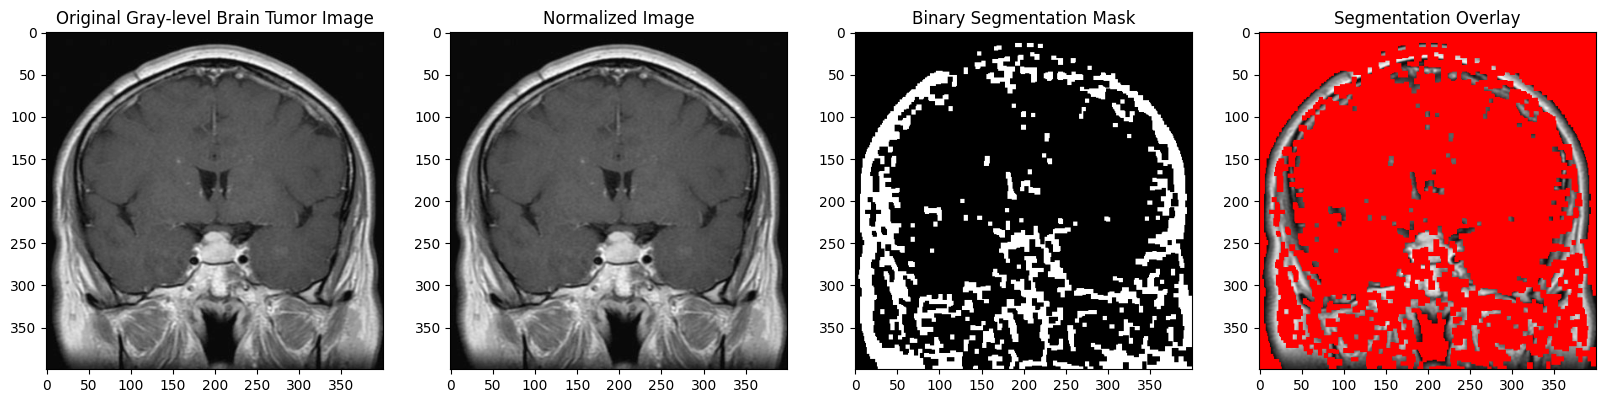

In [26]:
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt

# Function for Gray Level Normalization
def gray_level_normalization(image):
    normalized_image = image.astype(np.float32) / 255.0
    return normalized_image

# Function for Regional Binary Pattern (RBP) and Brain Tumor Segmentation
def brain_tumor_segmentation(image, region_size):
    normalized_image = gray_level_normalization(image)
    
    # Apply Regional Binary Pattern (RBP)
    rbp_features = feature.local_binary_pattern(normalized_image, P=8, R=1, method="uniform")
    
    # Threshold the RBP features to obtain a binary segmentation mask
    binary_segmentation_mask = (rbp_features > np.mean(rbp_features)).astype(np.uint8)
    
    # Apply morphological operations to enhance the mask
    kernel = np.ones((5, 5), np.uint8)
    binary_segmentation_mask = cv2.morphologyEx(binary_segmentation_mask, cv2.MORPH_CLOSE, kernel)
    binary_segmentation_mask = cv2.morphologyEx(binary_segmentation_mask, cv2.MORPH_OPEN, kernel)
    
    return binary_segmentation_mask

# Load and preprocess a gray-level brain tumor image
image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0029.jpg'  # Update with the actual path
gray_level_brain_tumor_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set the region size (number of segments)
region_size = 100

# Apply brain tumor segmentation using gray level normalization and regional binary pattern
binary_segmentation_mask = brain_tumor_segmentation(gray_level_brain_tumor_image, region_size)

# Display the results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

ax1.imshow(gray_level_brain_tumor_image, cmap='gray')
ax1.set_title('Original Gray-level Brain Tumor Image')

# Show the normalized image
normalized_image = gray_level_normalization(gray_level_brain_tumor_image)
ax2.imshow(normalized_image, cmap='gray')
ax2.set_title('Normalized Image')

ax3.imshow(binary_segmentation_mask, cmap='binary')
ax3.set_title('Binary Segmentation Mask')

# Overlay the segmentation mask on the original image for visualization
segmentation_overlay = cv2.cvtColor(gray_level_brain_tumor_image, cv2.COLOR_GRAY2RGB)
segmentation_overlay[binary_segmentation_mask == 1] = [255, 0, 0]  # Red color for segmentation
ax4.imshow(segmentation_overlay)
ax4.set_title('Segmentation Overlay')

plt.show()

In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [ ]:
train_data_path = '/kaggle/input/brain-tumor-mri-dataset/Training'

filepaths =[]
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
train_df

In [ ]:
test_data_path = '/kaggle/input/brain-tumor-mri-dataset/Testing'

filepaths =[]
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

## Split Data into Valid and Test

In [ ]:
valid , test = train_test_split(test_df , train_size = 0.5 , shuffle = True , random_state= 42)

## Image Data Generator

In [ ]:
img_size = (224 ,244)
batch_size = 16

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size , 
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size , 
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

## Show sample from train data

In [ ]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'black' , fontsize= 18)
    plt.axis('off')
plt.show();

## Model Structure

## Iterate

In [ ]:
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])# Assuming 'input_shape' is the shape of your input images
input_shape = (224, 224, 3)

# Define the number of classes in your dataset
num_classes = 4  # Change this according to the actual number of classes in your dataset

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(0.2),
    Dense(128, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Data generators
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Training',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

valid_gen = test_datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Testing',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
epochs = 2
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    validation_data=valid_gen,
    shuffle=True
)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

# Assuming 'input_shape' is the shape of your input images
input_shape = (224, 224, 3)

# Define the number of classes in your dataset
num_classes = 4  # Change this according to the actual number of classes in your dataset

# Build the CNN model
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.000296), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Data generators
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Training',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

valid_gen = test_datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Testing',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
epochs = 20
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    validation_data=valid_gen,
    shuffle=True
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_5 (Bat  (None, 222, 222, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 batch_normalization_6 (Bat  (None, 109, 109, 128)     512       
 chNormalization)                                                
                                                      

## Model Performance

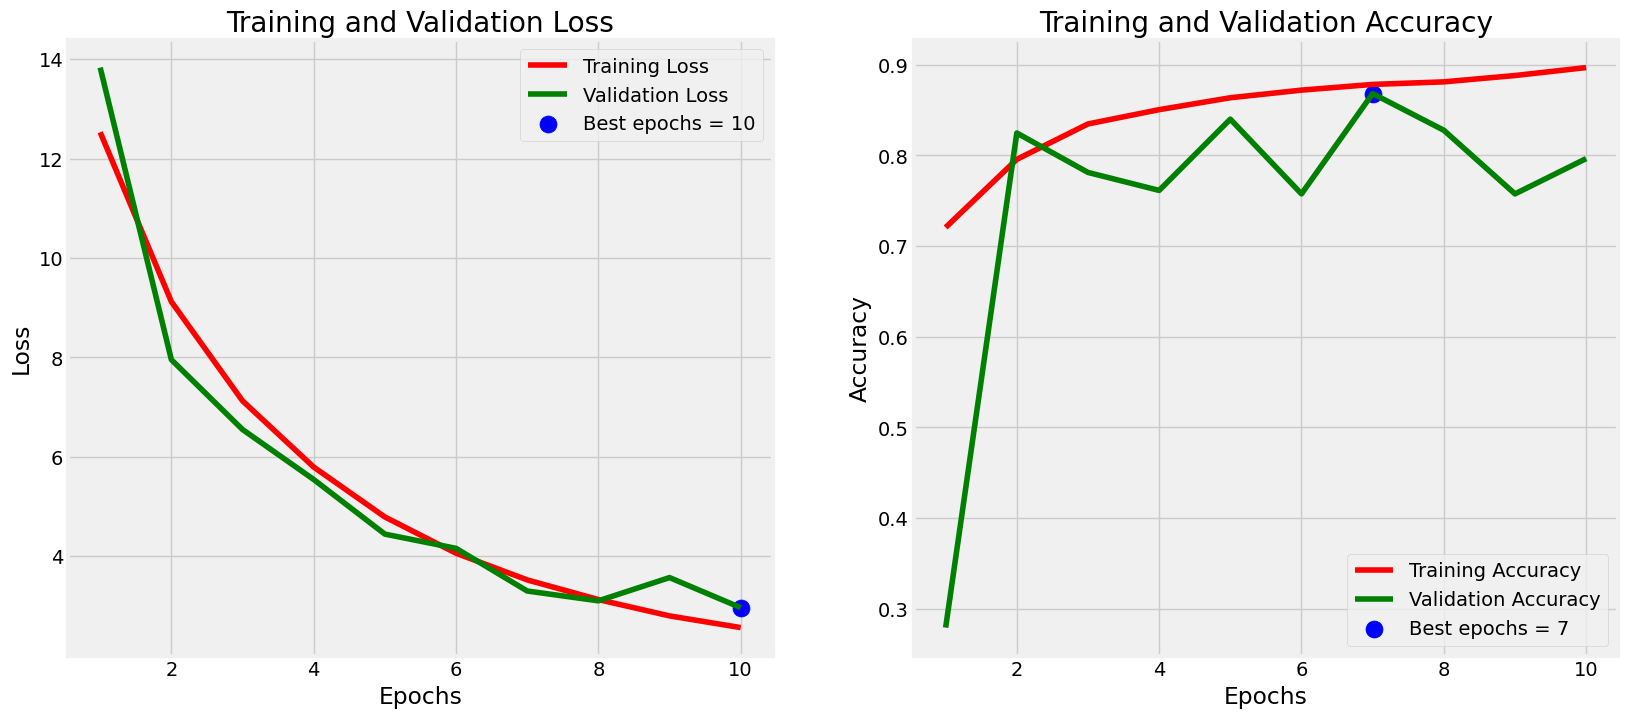

In [41]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

## Model Evaluation

In [ ]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

## Model Prediction

## Confusion Matrix and Classification Report

In [ ]:
preds = model.predict_generator(test_gen)

y_pred = np.argmax(preds , axis = 1)

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
#Classification Report
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

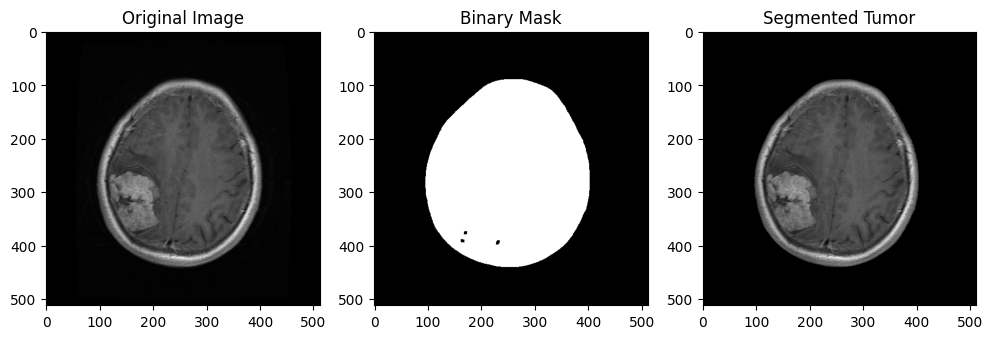

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image (replace 'path/to/your/image.jpg' with the actual path)
image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0010.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply adaptive thresholding to create a binary mask
_, binary_mask = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Optionally, perform morphological operations to enhance the mask
kernel = np.ones((5, 5), np.uint8)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

# Find contours in the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty mask for the tumor region
tumor_mask = np.zeros_like(binary_mask)

# Draw contours on the tumor mask
cv2.drawContours(tumor_mask, contours, -1, 255, thickness=cv2.FILLED)

# Bitwise AND operation to extract the tumor region from the original image
segmented_tumor = cv2.bitwise_and(image, image, mask=tumor_mask)

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')

plt.subplot(1, 3, 3)
plt.imshow(segmented_tumor, cmap='gray')
plt.title('Segmented Tumor')

plt.show()

In [ ]:
import numpy as np
from skimage import color, feature, io
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import os

# Example usage for glioma tumor segmentation
# Replace this with the actual path to your glioma images directory
glioma_images_directory = '/kaggle/input/brain-tumor-mri-dataset/Training/glioma'

# List all files in the directory
glioma_image_paths = [os.path.join(glioma_images_directory, filename) for filename in os.listdir(glioma_images_directory)]

# Assuming label 1 represents glioma
glioma_labels = [1] * len(glioma_image_paths)

# Prepare training data
X_glioma, y_glioma = prepare_data(glioma_image_paths, glioma_labels)
def compute_rbp(image, radius, num_points):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Compute the Regional Binary Pattern
    rbp = feature.local_binary_pattern(gray_image, num_points, radius, method='uniform')

    return rbp

def prepare_data(image_paths, labels):
    features = []
    target = []

    for image_path, label in zip(image_paths, labels):
        # Read the image
        image = io.imread(image_path)

        # Compute RBP features
        rbp = compute_rbp(image, radius=1, num_points=8)
        features.append(rbp.flatten())
        target.append(label)

    return np.array(features), np.array(target)

# Example usage for glioma tumor segmentation
# Replace these with the actual paths to your glioma images
glioma_image_paths = [
    '/kaggle/input/brain-tumor-mri-dataset/Training/glioma',
   
    # Add more paths as needed
]
glioma_labels = [1] * len(glioma_image_paths)  # Assuming label 1 represents glioma

# Prepare training data
X_glioma, y_glioma = prepare_data(glioma_image_paths, glioma_labels)

# Train SVM classifier for glioma
svm_glioma = SVC(kernel='linear', random_state=42)
svm_glioma.fit(X_glioma, y_glioma)

# Function to segment glioma tumor region using trained SVM
def segment_glioma_tumor(image, svm_model, radius=1, num_points=8):
    rbp = compute_rbp(image, radius, num_points)
    rbp_flat = rbp.flatten()
    predicted_labels = svm_model.predict([rbp_flat])
    segmented_glioma_tumor = predicted_labels.reshape(image.shape[:2])
    return segmented_glioma_tumor

# Example usage for segmentation of a glioma image
glioma_image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0007.jpg'
test_glioma_image = io.imread(glioma_image_path)
segmented_glioma_tumor = segment_glioma_tumor(test_glioma_image, svm_glioma)

# Visualization
plt.subplot(1, 2, 1)
plt.imshow(test_glioma_image)
plt.title('Original Glioma Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_glioma_tumor, cmap='viridis')
plt.title('Segmented Glioma Tumor')

plt.show()


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


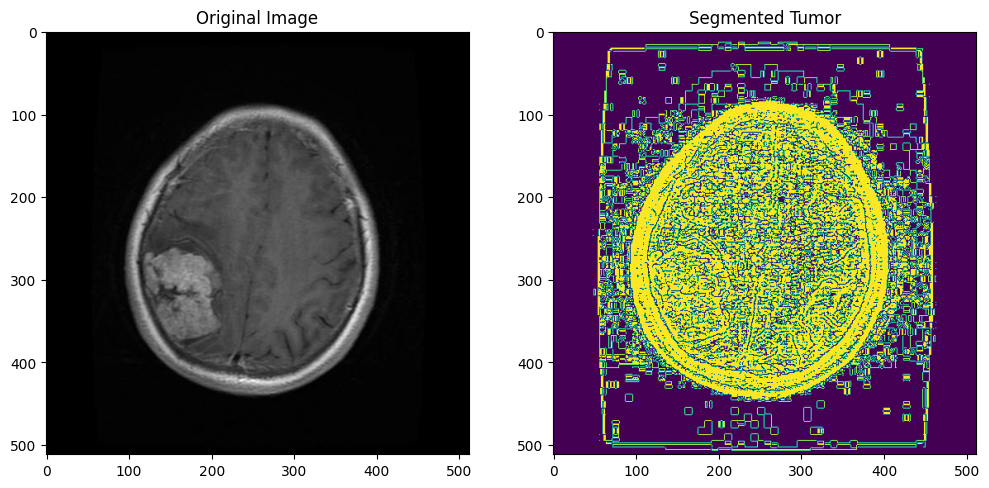

In [32]:
import cv2
import numpy as np
from skimage import color, feature
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def segment_tumor(image_path, radius=1, num_points=4, num_clusters=3):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the Local Binary Pattern
    lbp = feature.local_binary_pattern(gray_image, num_points, radius, method='uniform')

    # Flatten the LBP matrix
    lbp_flat = lbp.flatten()

    # Reshape the flat matrix to have one column
    lbp_flat = lbp_flat.reshape(-1, 1)

    # Apply K-Means clustering to separate tumor and non-tumor regions
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(lbp_flat)

    # Reshape the labels back to the shape of the original image
    segmented_tumor = kmeans.labels_.reshape(gray_image.shape)

    return segmented_tumor

def visualize_segmentation(image, segmented_tumor):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_tumor, cmap='viridis')
    plt.title('Segmented Tumor')

    plt.show()

# Example usage
image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0010.jpg'
segmented_tumor = segment_tumor(image_path, radius=1, num_points=8, num_clusters=2)
visualize_segmentation(cv2.imread(image_path), segmented_tumor)


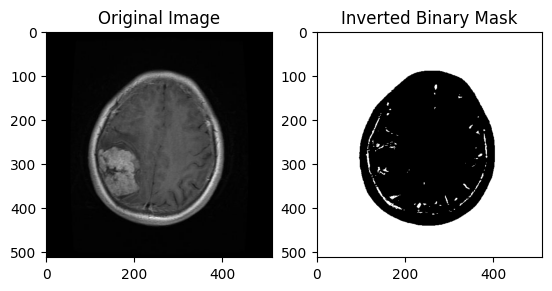

In [49]:
import cv2
import matplotlib.pyplot as plt

def otsu_segmentation(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Otsu's thresholding
    _, binary_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the binary mask
    inverted_mask = cv2.bitwise_not(binary_mask)

    return inverted_mask

# Example usage
image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0010.jpg'
inverted_mask = otsu_segmentation(image_path)

# Visualization
original_image = cv2.imread(image_path)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(inverted_mask, cmap='gray')
plt.title('Inverted Binary Mask')

plt.show()


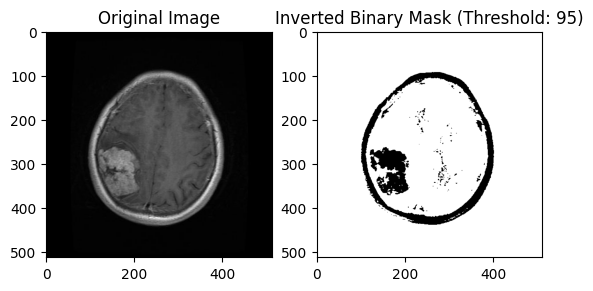

In [65]:
import cv2
import matplotlib.pyplot as plt

def custom_threshold_segmentation(image_path, threshold_value=95):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply custom thresholding
    _, binary_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the binary mask
    inverted_binary_mask = cv2.bitwise_not(binary_mask)

    return inverted_binary_mask

# Example usage with a threshold of 110
image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0010.jpg'
threshold_value = 95
inverted_binary_mask = custom_threshold_segmentation(image_path, threshold_value)

# Visualization
original_image = cv2.imread(image_path)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(inverted_binary_mask, cmap='gray')
plt.title(f'Inverted Binary Mask (Threshold: {threshold_value})')

plt.show()


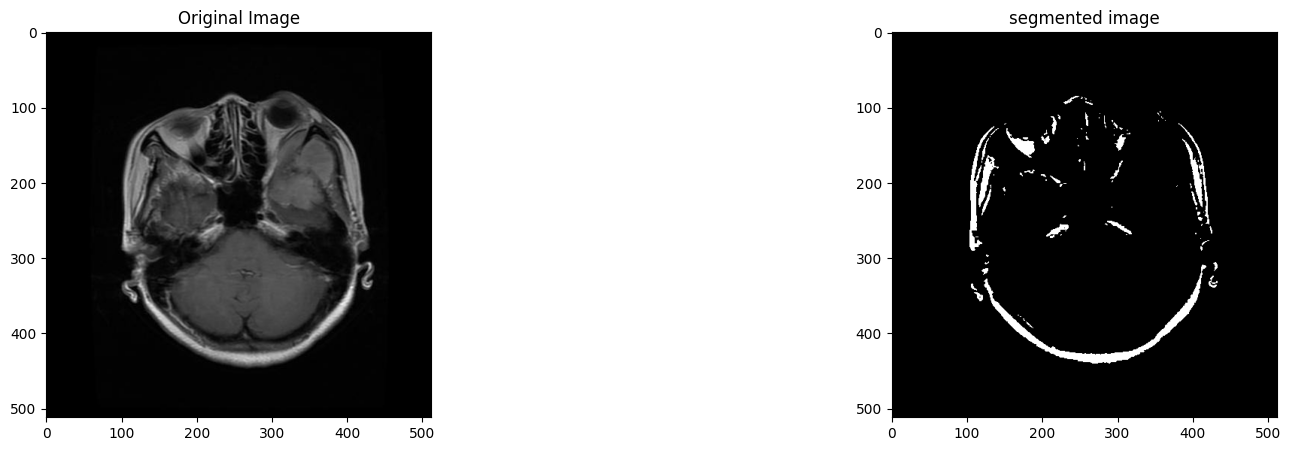

In [20]:
import cv2
import matplotlib.pyplot as plt

def custom_threshold_segmentation(image_path, threshold_value=125):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply custom thresholding
    _, binary_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    return binary_mask

# Example usage with a threshold of 110
image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0027.jpg'
threshold_value = 125
binary_mask = custom_threshold_segmentation(image_path, threshold_value)

# Visualization
original_image = cv2.imread(image_path)

plt.figure(figsize=(20, 5))  # Use plt.figure to set the overall figure size

plt.subplot(1, 2, 1)  # Subplot with index 1
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)  # Subplot with index 2
plt.imshow(binary_mask, cmap='gray')
plt.title(f'segmented image')

plt.show()


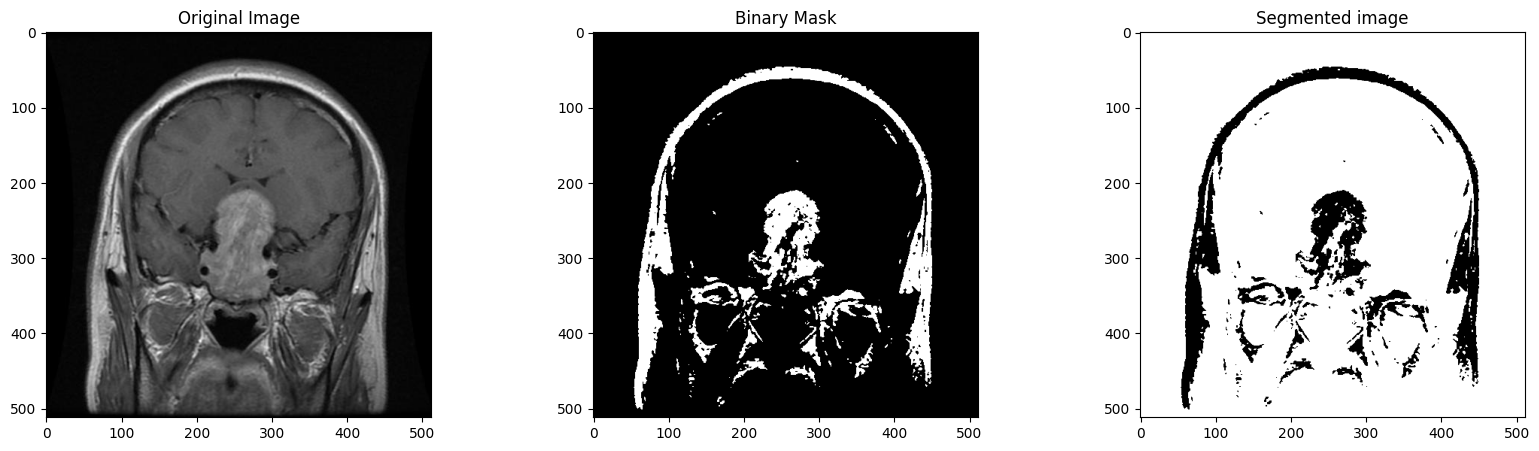

In [23]:
import cv2
import matplotlib.pyplot as plt

def custom_threshold_segmentation(image_path, threshold_value=115):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply custom thresholding
    _, binary_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the binary mask
    inverted_binary_mask = cv2.bitwise_not(binary_mask)

    return binary_mask, inverted_binary_mask

# Example usage with a threshold of 98
image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0269.jpg'
threshold_value = 115
binary_mask, inverted_binary_mask = custom_threshold_segmentation(image_path, threshold_value)

# Visualization
original_image = cv2.imread(image_path)

plt.figure(figsize=(20, 5))  # Use plt.figure to set the overall figure size

plt.subplot(1, 3, 1)  # Subplot with index 1
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)  # Subplot with index 2
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')

plt.subplot(1, 3, 3)  # Subplot with index 3
plt.imshow(inverted_binary_mask, cmap='gray')
plt.title('Segmented image')

plt.show()


In [ ]:
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt

# Function for Gray Level Normalization
def gray_level_normalization(image):
    normalized_image = image.astype(np.float32) / 255.0
    return normalized_image

# Function for Regional Binary Pattern (RBP) and Brain Tumor Segmentation
def brain_tumor_segmentation(image, region_size, threshold_value):
    normalized_image = gray_level_normalization(image)
    
    # Apply Regional Binary Pattern (RBP)
    rbp_features = feature.local_binary_pattern(normalized_image, P=8, R=1, method="uniform")
    
    # Threshold the RBP features to obtain a binary segmentation mask
    binary_segmentation_mask = (rbp_features > np.mean(rbp_features)).astype(np.uint8)
    
    # Apply morphological operations to enhance the mask
    kernel = np.ones((5, 5), np.uint8)
    binary_segmentation_mask = cv2.morphologyEx(binary_segmentation_mask, cv2.MORPH_CLOSE, kernel)
    binary_segmentation_mask = cv2.morphologyEx(binary_segmentation_mask, cv2.MORPH_OPEN, kernel)
    
    # Additional thresholding step
    binary_segmentation_mask = (binary_segmentation_mask > threshold_value).astype(np.uint8)
    
    return binary_segmentation_mask

# Load and preprocess a gray-level brain tumor image
image_path = '/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0019.jpg'  # Update with the actual path
gray_level_brain_tumor_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set the region size (number of segments)
region_size = 100

# Set the threshold value for additional thresholding
threshold_value = 95

# Apply brain tumor segmentation using gray level normalization, regional binary pattern, and additional thresholding
binary_segmentation_mask = brain_tumor_segmentation(gray_level_brain_tumor_image, region_size, threshold_value)

# Display the results
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))

ax1.imshow(gray_level_brain_tumor_image, cmap='gray')
ax1.set_title('Original Gray-level Brain Tumor Image')

# Show the normalized image
normalized_image = gray_level_normalization(gray_level_brain_tumor_image)
ax2.imshow(normalized_image, cmap='gray')
ax2.set_title('Normalized Image')

ax3.imshow(binary_segmentation_mask, cmap='binary')
ax3.set_title('Binary Segmentation Mask')

# Overlay the segmentation mask on the original image for visualization
segmentation_overlay = cv2.cvtColor(gray_level_brain_tumor_image, cv2.COLOR_GRAY2RGB)
segmentation_overlay[binary_segmentation_mask == 1] = [255, 0, 0]  # Red color for segmentation
ax4.imshow(segmentation_overlay)
ax4.set_title('Segmentation Overlay')
ax5.imshow(binary_segmentation_mask)
ax5.set_title('Segmented image')
plt.show()
